<a href="https://colab.research.google.com/github/indrasz/Strategi-Algoritma/blob/main/genom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import gzip
import csv
from google.colab import files

def divide_and_conquer_genome_mapping(sequence, start, end):
    """
    Melakukan pemetaan genom dengan metode divide & conquer.
    """
    if start == end:
        return sequence[start]
    if start > end:
        return ""

    # Menentukan titik tengah untuk pembagian
    mid = (start + end) // 2

    # Pemetaan rekursif pada kedua bagian
    left_mapping = divide_and_conquer_genome_mapping(sequence, start, mid)
    right_mapping = divide_and_conquer_genome_mapping(sequence, mid + 1, end)

    # Menggabungkan hasil pemetaan dari kedua bagian
    return merge_mappings(left_mapping, right_mapping)

def merge_mappings(left, right):
    """
    Menggabungkan hasil pemetaan dua sub-sekuens.
    """
    # Contoh penggabungan: cukup menggabungkan dua string
    return left + right

def download_genome_sequence(url):
    """
    Mengunduh data sekuens genomik dari URL dan mengembalikannya sebagai string.
    """
    response = requests.get(url, stream=True)
    response.raise_for_status()
    with gzip.open(response.raw, 'rt') as f:
        genome_sequence = f.read()
    return genome_sequence

def fasta_to_csv(fasta_data, csv_file_path):
    """
    Mengonversi data FASTA ke format CSV.
    """
    with open(csv_file_path, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Header', 'Sequence'])  # Menulis header CSV

        lines = fasta_data.split('\n')
        header = ''
        sequence = ''

        for line in lines:
            if line.startswith('>'):
                if header and sequence:  # Simpan header dan sequence sebelumnya
                    csvwriter.writerow([header, sequence])
                header = line[1:]  # Buang karakter '>' dari header
                sequence = ''
            else:
                sequence += line.strip()

        # Menyimpan data terakhir setelah loop selesai
        if header and sequence:
            csvwriter.writerow([header, sequence])

# Contoh URL dari NCBI atau Human Genome Project
genome_url = "https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_46/gencode.v46.pc_translations.fa.gz"

csv_file_path = 'genome_sequences.csv'

try:
    # Mengunduh data sekuens genomik
    genome_sequence = download_genome_sequence(genome_url)

    # Menyimpan data FASTA ke file CSV
    fasta_to_csv(genome_sequence, csv_file_path)

    print(f"File CSV telah dibuat: {csv_file_path}")

    # Mengunduh file CSV ke perangkat pengguna
    files.download(csv_file_path)
except Exception as e:
    print(f"Error: {e}")

File CSV telah dibuat: genome_sequences.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

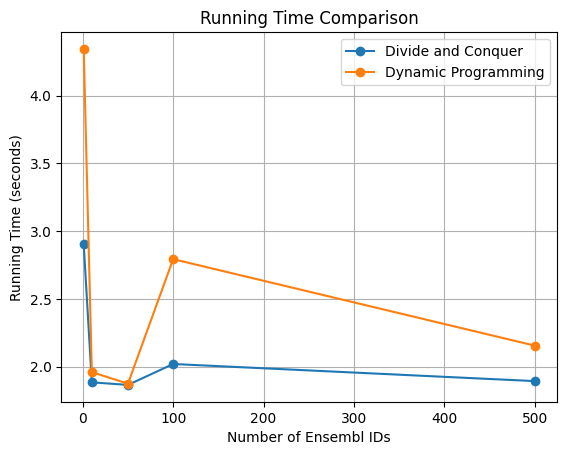

In [8]:
import requests
import time
import matplotlib.pyplot as plt

# Function to get Ensembl information
def get_ensembl_info(ensembl_id, ensembl_type):
    base_url = "https://rest.ensembl.org"
    endpoints = {
        "gene": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "transcript": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "protein": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json"
    }

    url = endpoints.get(ensembl_type)
    if url is None:
        return None

    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Divide and conquer approach
def divide_and_conquer(ensembl_ids):
    results = {}
    for ensembl_type, ensembl_id in ensembl_ids.items():
        info = get_ensembl_info(ensembl_id, ensembl_type)
        if info:
            results[ensembl_type] = info
        else:
            results[ensembl_type] = f"No data found for ID: {ensembl_id}"
    return results

# Dynamic programming approach
def dynamic_programming(ensembl_ids):
    results = {}
    cache = {}
    for ensembl_type, ensembl_id in ensembl_ids.items():
        if ensembl_id in cache:
            results[ensembl_type] = cache[ensembl_id]
        else:
            info = get_ensembl_info(ensembl_id, ensembl_type)
            if info:
                cache[ensembl_id] = info
                results[ensembl_type] = info
            else:
                results[ensembl_type] = f"No data found for ID: {ensembl_id}"
    return results

# Ensembl IDs provided
ensembl_ids = {
    "gene": "ENSG00000186092",
    "transcript": "ENST00000641515",
    "protein": "ENSP00000493376"
}

# Benchmarking and comparison
divide_times = []
dynamic_times = []
sizes = [1, 10, 50, 100, 500]  # Different input sizes

for size in sizes:
    test_ids = {k: ensembl_ids[k] for k in list(ensembl_ids.keys()) * size}

    # Time divide and conquer
    start_time = time.time()
    divide_and_conquer(test_ids)
    end_time = time.time()
    divide_times.append(end_time - start_time)

    # Time dynamic programming
    start_time = time.time()
    dynamic_programming(test_ids)
    end_time = time.time()
    dynamic_times.append(end_time - start_time)

# Plotting the results
plt.plot(sizes, divide_times, label='Divide and Conquer', marker='o')
plt.plot(sizes, dynamic_times, label='Dynamic Programming', marker='o')
plt.xlabel('Number of Ensembl IDs')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time Comparison')
plt.legend()
plt.grid(True)
plt.show()